In [1]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import matplotlib as mpl
#
mpl.rcParams['font.family'] = 'NanumGothic'

In [2]:
kospi = fdr.DataReader('KS11', '2023-01-01')  # 코스피 지수
data = fdr.DataReader('FCHI',start = '2021', end='2024')
data

,Open,High,Low,Close,Volume,Adj Close
2021-01-04,5614.040039,5656.419922,5567.970215,5588.959961,82741000,5588.959961
2021-01-05,5561.600098,5603.660156,5530.479980,5564.600098,79263400,5564.600098
2021-01-06,5601.009766,5648.419922,5553.390137,5630.600098,116286300,5630.600098
2021-01-07,5651.040039,5689.279785,5629.490234,5669.850098,91729600,5669.850098
2021-01-08,5711.580078,5721.890137,5676.149902,5706.879883,87558400,5706.879883
...,...,...,...,...,...,...
2023-12-21,7557.160156,7574.709961,7537.810059,7571.399902,36202800,7571.399902
2023-12-22,7560.970215,7589.000000,7557.580078,7568.819824,31755700,7568.819824
2023-12-27,7580.970215,7603.270020,7560.540039,7571.819824,31599200,7571.819824
2023-12-28,7591.850098,7593.959961,7531.709961,7535.160156,31277400,7535.160156


In [3]:
# 이동평균 계산
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA60'] = data['Close'].rolling(window=60).mean()
data['MA120'] = data['Close'].rolling(window=120).mean()


In [4]:
# 이동평균별 최고치와 최저치 날짜와 함께 출력
print("MA5 최고치:", data['MA5'].max(), "날짜:", data['MA5'].idxmax(), "최저치:", data['MA5'].min(), "날짜:", data['MA5'].idxmin())
print("MA20 최고치:", data['MA20'].max(), "날짜:", data['MA20'].idxmax(), "최저치:", data['MA20'].min(), "날짜:", data['MA20'].idxmin())
print("MA60 최고치:", data['MA60'].max(), "날짜:", data['MA60'].idxmax(), "최저치:", data['MA60'].min(), "날짜:", data['MA60'].idxmin())
print("MA120 최고치:", data['MA120'].max(), "날짜:", data['MA120'].idxmax(), "최저치:", data['MA120'].min(), "날짜:", data['MA120'].idxmin())

MA5 최고치: 7579.94404296875 날짜: 2023-12-20 00:00:00 최저치: 5470.91005859375 날짜: 2021-02-01 00:00:00
MA20 최고치: 7504.197998046875 날짜: 2023-12-29 00:00:00 최저치: 5574.222485351563 날짜: 2021-02-05 00:00:00
MA60 최고치: 7356.986507161459 날짜: 2023-07-04 00:00:00 최저치: 5744.900480143229 날짜: 2021-03-26 00:00:00
MA120 최고치: 7329.694083658854 날짜: 2023-09-20 00:00:00 최저치: 6049.856909179687 날짜: 2021-06-22 00:00:00


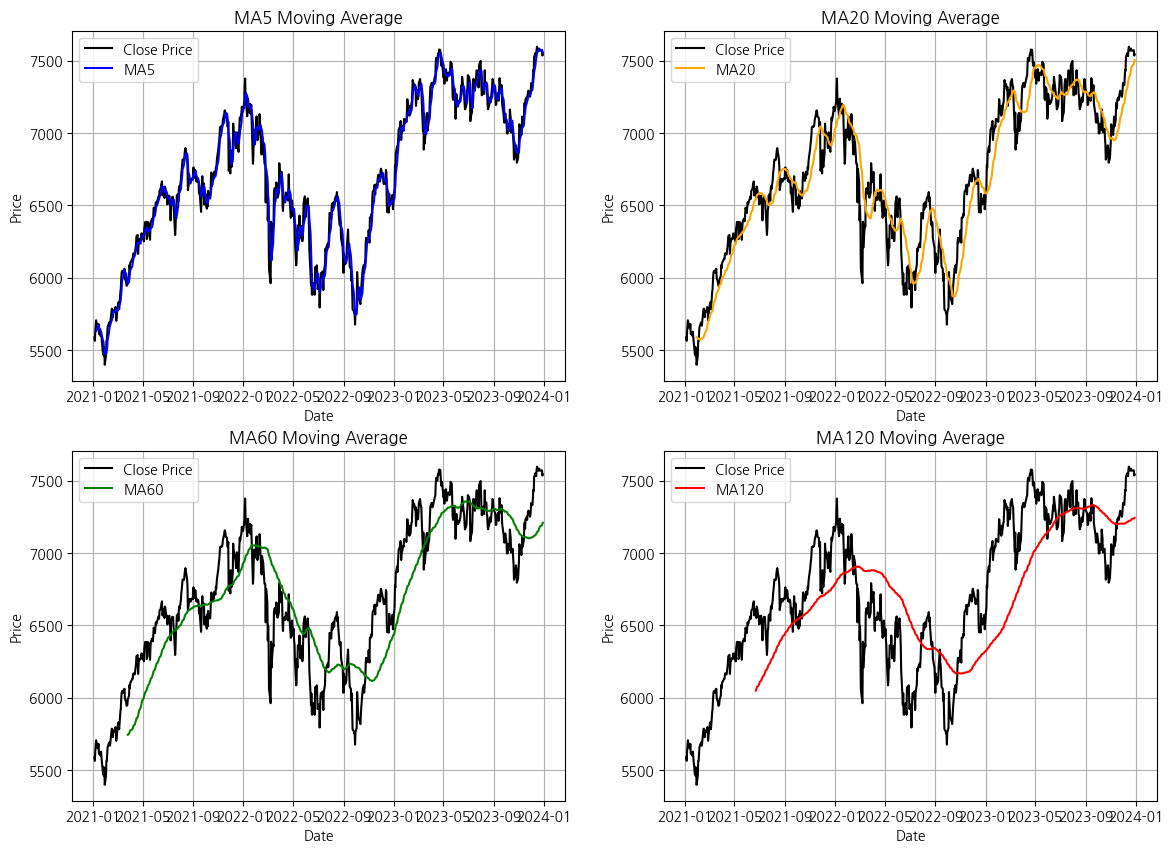

In [5]:


# 차트 시각화
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, window in enumerate([5, 20, 60, 120]):
    ax = axs[i // 2, i % 2]  
    ax.plot(data['Close'], label='Close Price', color='black')
    ax.plot(data[f'MA{window}'], label=f'MA{window}', color='blue' if window == 5 else 
            'orange' if window == 20 else 'green' if window == 60 else 'red')
    ax.set_title(f'MA{window} Moving Average')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)
plt.show()